In [1]:
import pandas as pd
df=pd.read_csv('c:/data/spam/spam.csv',encoding='latin1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['v1']=df['v1'].replace(['ham','spam'],[0,1])
df[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

0    4825
1     747
Name: v1, dtype: int64


<AxesSubplot:>

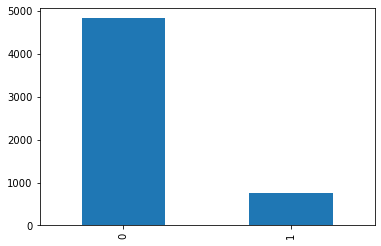

In [4]:
print(df['v1'].value_counts())
df['v1'].value_counts().plot(kind='bar')

In [5]:
X=df[['v2']]
y=df['v1']
print(X[:3])
print(y[:3])

                                                  v2
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
0    0
1    0
2    1
Name: v1, dtype: int64


In [6]:
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=['v2'])
y_samp=pd.DataFrame(data=y_sample,columns=['v1'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

0    747
1    747
Name: v1, dtype: int64


<AxesSubplot:>

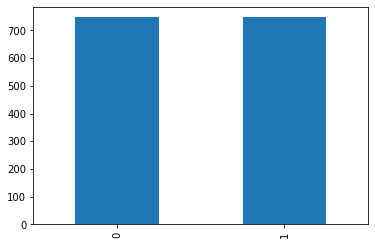

In [7]:
print(df_samp['v1'].value_counts())
df_samp['v1'].value_counts().plot(kind='bar')

In [8]:
X=df_samp['v2']
y=df_samp['v1']

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)
sequences=tokenizer.texts_to_sequences(X)
print(sequences[:5])

[[1486, 49, 801, 1487, 18, 336, 87, 26, 2274, 45, 27, 173], [1148, 14, 4, 25, 613], [174, 149, 4, 2, 189, 5, 105, 17, 614, 613], [946, 88, 38, 399, 702, 1, 2275, 1488, 130, 2276, 26, 1489, 242, 45, 702, 1, 2277, 2278, 24, 46, 1149], [7, 291, 1490, 802, 553, 53, 316, 26, 803, 703, 25, 63, 47, 217, 1491, 13, 434, 337, 97]]


In [10]:
word_to_index=tokenizer.word_index
print(word_to_index)

{'to': 1, 'you': 2, 'a': 3, 'call': 4, 'i': 5, 'the': 6, 'u': 7, 'your': 8, 'for': 9, 'is': 10, 'now': 11, 'and': 12, '2': 13, 'free': 14, 'or': 15, 'have': 16, 'in': 17, 'on': 18, 'ur': 19, 'of': 20, 'txt': 21, '4': 22, 'with': 23, 'from': 24, 'me': 25, 'my': 26, 'get': 27, 'are': 28, 'text': 29, 'it': 30, 'mobile': 31, 'stop': 32, 'just': 33, 'no': 34, 'this': 35, 'claim': 36, 'reply': 37, 'we': 38, 'be': 39, 'out': 40, 'if': 41, 'www': 42, 'that': 43, 'do': 44, 'can': 45, 'our': 46, 'at': 47, 'prize': 48, 'only': 49, 'not': 50, 'will': 51, 'send': 52, 'so': 53, 'new': 54, 'cash': 55, 'go': 56, 'won': 57, 'please': 58, 'but': 59, '150p': 60, "i'm": 61, 't': 62, 'up': 63, 'win': 64, 'uk': 65, 'nokia': 66, 'week': 67, 'what': 68, 'urgent': 69, 'all': 70, 'know': 71, 'who': 72, 'by': 73, 'msg': 74, '1': 75, 'as': 76, 'tone': 77, 'contact': 78, 'want': 79, 'com': 80, 'been': 81, 'service': 82, 'ok': 83, '50': 84, 'good': 85, 'co': 86, 'phone': 87, 'then': 88, 'r': 89, 'customer': 90, '16

메일의 최대 길이: 77
메일의 평균 길이: 19.846051


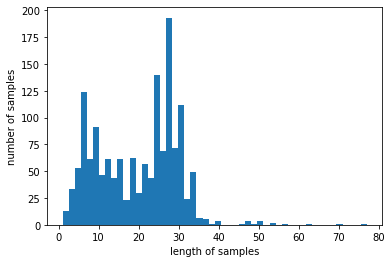

In [11]:
import matplotlib.pyplot as plt
X_data = sequences
print('메일의 최대 길이: %d' % max(len(l) for l in X_data)) 
print('메일의 평균 길이: %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data=pad_sequences(X_data,maxlen=77)
print("학습용 데이터의 크기(shape):",data.shape)
print(data[:1])

학습용 데이터의 크기(shape): (1494, 77)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1486   49  801 1487   18
   336   87   26 2274   45   27  173]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,
y, test_size=0.2, stratify=y, random_state=10)

In [14]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,SimpleRNN
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Embedding(len(word_to_index)+1,32))
model.add(SimpleRNN(32))
#model.add(LSTM(16))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, y_train.values, epochs=10,batch_size=64, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 2s 89ms/step - loss: 0.6241 - accuracy: 0.6728 - val_loss: 0.4809 - val_accuracy: 0.8368
Epoch 2/10
15/15 [==============================] - 0s 13ms/step - loss: 0.4066 - accuracy: 0.8640 - val_loss: 0.3718 - val_accuracy: 0.8787
Epoch 3/10
15/15 [==============================] - 0s 12ms/step - loss: 0.2861 - accuracy: 0.9210 - val_loss: 0.2721 - val_accuracy: 0.9205
Epoch 4/10
15/15 [==============================] - 0s 14ms/step - loss: 0.1747 - accuracy: 0.9708 - val_loss: 0.3581 - val_accuracy: 0.8577
Epoch 5/10
15/15 [==============================] - 0s 17ms/step - loss: 0.1341 - accuracy: 0.9775 - val_loss: 0.2246 - val_accuracy: 0.9372
Epoch 6/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0951 - accuracy: 0.9896 - val_loss: 0.1948 - val_accuracy: 0.9414
Epoch 7/10
15/15 [==============================] - 0s 16ms/step - loss: 0.0764 - accuracy: 0.9836 - val_loss: 0.1875 - val_accuracy: 0.9414
Epoch 8/10
15

In [16]:
model.evaluate(X_test, y_test.values, verbose=0)

[0.2355583757162094, 0.9130434989929199]

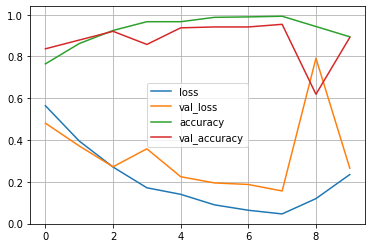

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [18]:
df.iloc[:3,:]
model.predict(X_test[:3])

array([[0.9217046 ],
       [0.06009775],
       [0.98235625]], dtype=float32)

In [19]:
pred=model.predict(X_test)
pred[:10]

array([[0.9217046 ],
       [0.06009775],
       [0.98235625],
       [0.9870713 ],
       [0.97458637],
       [0.19987956],
       [0.69903934],
       [0.9722847 ],
       [0.936346  ],
       [0.9426329 ]], dtype=float32)

In [20]:
import numpy as np
np.round(pred[:10])

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)